# Máquinas de Vetores Suporte (SVM; *Support Vector Machines*)

A que este nome remete?

____

**Margens:**

Significados:
- Espaço situado no contorno externo imediato de algo; borda, limite externo, periferia (freq. us. no pl.)
    * Ex.: "as margem de um bosque"
- Faixa de terras emersas ou firmes que ladeiam um rio, lago ou lagoa; beira, borda
    * Ex.: "o hotel situa-se à margem do lago"

**Margem:** Uma região que divide 2 áreas diferentes (2 tipos diferentes de instância – água e terra na barricada de areia e pedra).

![](https://media.istockphoto.com/photos/calm-river-by-misty-forest-picture-id852162900?k=6&m=852162900&s=612x612&w=0&h=eYN-71KYFFTdWIYUNC1I7ZQw8KaaQKO57A3nSBshhGk=)

## 1) Introdução

Na aula de hoje, falaremos sobre um dos mais interessantes métodos de aprendizagm supervisionada: **SVM** (**S**upport **V**ector **M**achines).

Este método tem uma construção extremamente elegante e robusta, que, apesar de complexa, pode ser entendida em termos geométricos razoavelmente simples. Nesta aula, vamos explorar os principais aspectos desta construção, em uma apresentação mais alto-nível, sem nos preocuparmos demais com os detalhes matemáticos.

Um ponto importantíssimo sobre SVMs, que é o que de fato lhes confere poder tão elevado, é sua **capacidade de produzir uma hipótese simples, a partir de um conjunto de hipóteses complexo**, o que tem consequências diretas na **capacidade de generalização** de modelos deste tipo: eles são capazes de generalizar muito bem, apesar das hipóteses produzidas parecerem altamente complexas, o que é algo formidável!

Não entraremos nos detalhes matemáticos que justificam e provam os pontos acima. Mas, para quem tiver interesse, quase todo livro-texto de machine learning aborda estas questões. Recomendo, em particular, [este livro](https://www.google.com.br/books/edition/Learning_with_Kernels/7r34DwAAQBAJ?hl=pt-BR&gbpv=1&dq=learning+with+kernels&printsec=frontcover), que detalha extensivamente SVM e métodos relacionados; ou então [este livro](https://cs.nyu.edu/~mohri/mlbook/), que aborda formalmente a teoria de aprendizagem, eventualmente culminando no enorme sucesso de SVMs. Por fim, aproveito também pra recomendar [este curso](https://work.caltech.edu/index.html) do Caltech, onde os tópicos abordados no livro do Mohri são apresentados de maneira clara, direta, e muito ilustrativa. Esta é minha maior recomendação para quem tem interesse em iniciar os estudos em teoria de aprendizagem estatística, e então ter todo o fundamento rigoroso pra entender porque SVMs são tão interessantes!

Agora, vamos iniciar nossa exposição, introduzindo um conceito fundamental para SVMs: a **margem**, e os chamados **classificadores de margem**.

____

## 2) Classificadores de margem

Considere o seguinte dataset supervisionado de um problema de classificação binário:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/d8d83e07-66d8-47c6-a5e4-4a3e232481e2.PNG width=400>

É visível que os dados são linearmente separáveis. De fato, existem infinitas retas possíveis que separam perfeitamente as duas classes. Alguns exemplos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/bbf3d0a6-4707-471b-9f19-7290c13e4f23.PNG width=400>

Vamos olhar separadamente para cada um destes três modelos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/6c0bea51-dda9-400c-bb68-d7396e4fa606.PNG width=900>

Apesar de ambos separarem perfeitamente os dados de treino (erro de treino é nulo!), podemos nos perguntar: qual deles tem potencial de apresentar **melhor generalização?**

Para refletirmos sobre isso, considere que queremos classificar o ponto de teste indicado em preto:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/fbed2deb-bb38-4ef5-8558-99b7aff5c7b7.PNG width=900>

É super razoável que este ponto seja classificado como sendo da classe vermelha, não é mesmo? No entanto, o primeiro classificador irá classificá-lo como pertencente à classe azul.

Podemos nos perguntar: por que isso acontece?

Intuitivamente, é possível dizer que a fronteira de decisão do primeiro modelo está "**muito próxima**" dos pontos da classe vermelha, não é?

Mas, se estamos avaliando a **fronteira de decisão**, é razoável que nos importemos, na realidade, com a proximidade entre ela **e os "pontos mais externos"** da respectiva classe, não é mesmo? Afinal, intuitivamente, estes são os pontos que exercem maior influência sobre a fornteira de decisão, justo?

É aqui que entra o conceito de **margem**:

> Chamamos de **margem** a **menor distância** entre os pontos de treino e a fronteira de decisão

A seguir, visualizamos as margens associadas a cada um dos três modelos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/72f191fc-7bc0-4451-923a-ecb939e88111.PNG width=900>

Dada a definição de margem, fica claro que o terceiro modelo seria nossa melhor opção, pois ele **apresenta maior margem**. De fato, intuitivamente, um classificador que apresenta maior margem, terá melhores chances de generalização!

> Chamamos de **classificador de margem máxima** um classificador **linear** que é construído de modo que a margem seja maximizada.

____
<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Conclusões</h2>
<ul>
<li>Um classificador de margem máxima tem alto potencial de generalização, para dados linearmente separáveis.
</ul>
</span>
<br>
</div>

____

No entanto, a intuição de que um classificador de margem máxima sempre será nossa melhor opção não é 100% correta... Considere o dataset a seguir, bem parecido com o dataset original, mas contendo um outlier da classe vermelha:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/79154075-f167-4c46-b361-e1febbaa4d83.PNG width=400>

Devido a este outlier, até mesmo o classificador de margem máxima terá uma generalização ruim, pois mesmo a margem máxima é extremamente estreita, o que aumenta a variância do modelo:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/da32de74-064a-43a7-98cc-366a348fe275.PNG width=400>

E pode ser que problemas ainda mais graves ocorram, caso outliers ainda mais "extremos" existam, como no caso do dataset a seguir:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/7be60cd3-e7f8-46bd-85bc-73ec1d4b0bb5.PNG width=400>

Neste caso, nós não temos mais separabilidade linear, de modo que a construção de um classificador de margem máxima não é mais possível.

Como resolver este problema?

Com a introdução do **classificador de margem suave (*soft margin classifier*)**!

### Classificador de margem suave

Um classificador de margem suave é obtido com uma modificação extremamente simples com relação ao classificador de margem máxima: a permissão de que **erros de classificação** sejam cometidos na base de treino! Uma possível solução seria algo assim:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/cfacd48d-9713-4bec-9fd7-ea1b4ae380f5.PNG width=400>

Neste caso, temos duas observações incorretas dentro da margem - e está tudo bem, pois dados que estas observações são outliers, não precisamos mos preocupar em ajustar a margem a elas!

Com isso, temos um modelo com um viés um pouco maior, mas com variância bem menor - caminhamos na direção do **sweet spot** de generalização!!

Note, portanto, que a introdução de uma margem suave pode ser vista como **um procedimento de regularização** aplicado ao classificador de margem! E é exatamente assim que veremos este procedimento quando chegarmos em SVM - um procedimento de regularização!

> Um classificador de margem suave é também chamado de **classificador de vetores de suporte (*support vector classifier*)**, sendo que os pontos que "apoiam" a margem são justamente os chamados **vetores de suporte (*support vectors*)**.

Estamos chegando perto das SVMs!

Mas, antes de chegarmos lá, é importante frisarmos um ponto fundamental:

> A **fronteira de decisão** de um classificador de margem suave (de vetores de suporte) é **linear** no espaço de features em que o classificador é treinado, ou seja, a hipótese treinada (isto é, a superfície de decisão) será **um hiperplano** de dimensão $D-1$, onde $D$ é a dimensão do espaço de features

Vamos entender melhor o comentário acima com alguns exemplos:

### $D=2$

Se temos uma duas features $(X_1, X_2)$, teremos um **hiperplano $1-$ dimensional**, que nada mais é que **uma reta** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/6ca9b6d4-90fb-4d92-8a73-42ecec09d562.PNG width=400>

### $D=3$

Se temos uma três features $(X_1, X_2, X_3)$, teremos um **hiperplano $2-$ dimensional**, que nada mais é que **um plano** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/b91951b3-9256-4a38-abd6-287811332db8.PNG width=400>

### $D=1$

Se temos uma única feature $(X)$, teremos um **hiperplano $0-$dimensional**, que nada mais é que **um ponto** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/000d5eb5-25e7-485b-bf36-6ad944970e27.PNG width=400>

Para dimensões maiores, $D > 3$, não conseguimos mais visualizar a fronteira de decisão, mas, se qualquer forma, ela será linear (por isso, um hiper**plano**!).

Agora estamos prontos para introduzir as tão aguardadas **Support Vector Machines!**


<img src=" 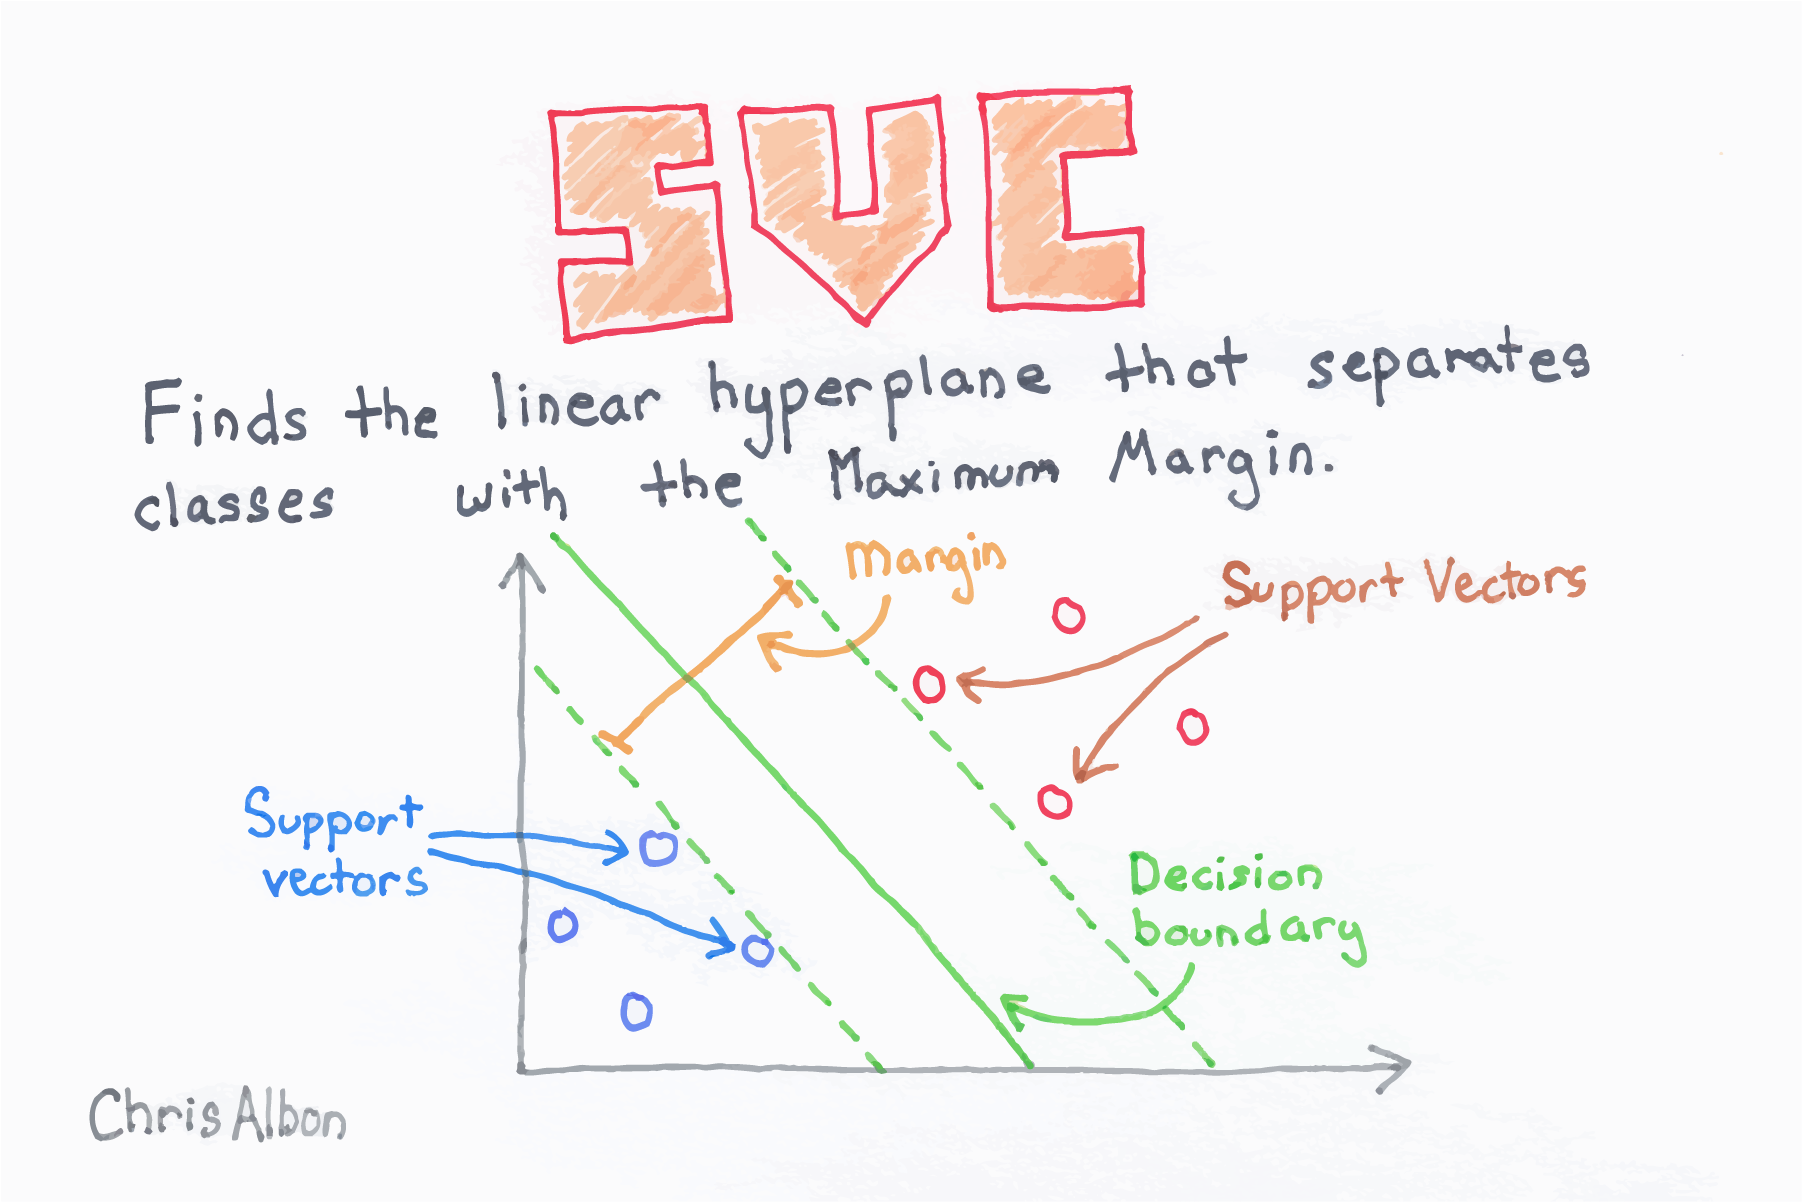" width=500 />

____
## Visualizar o dataset iris

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

**MinMaxScaler:**

$$X_{norm} = \frac{X-X_{min}}{X_{max}-X_{min}}$$

**StandardScaler:**

$$X_{pad} = \frac{X-\mu}{\sigma}$$

In [4]:
df = sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
#Separando dados de treino e teste
X = df.drop(columns = 'species')
y = df['species']

In [8]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [10]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [11]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
x1 = 'sepal_length'
x2 = 'petal_length'

<Axes: xlabel='sepal_length', ylabel='petal_length'>

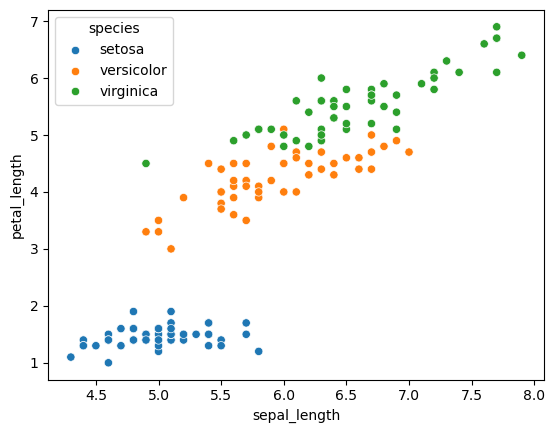

In [13]:
sns.scatterplot(data = df,
               x = x1,
               y = x2,
               hue = 'species')

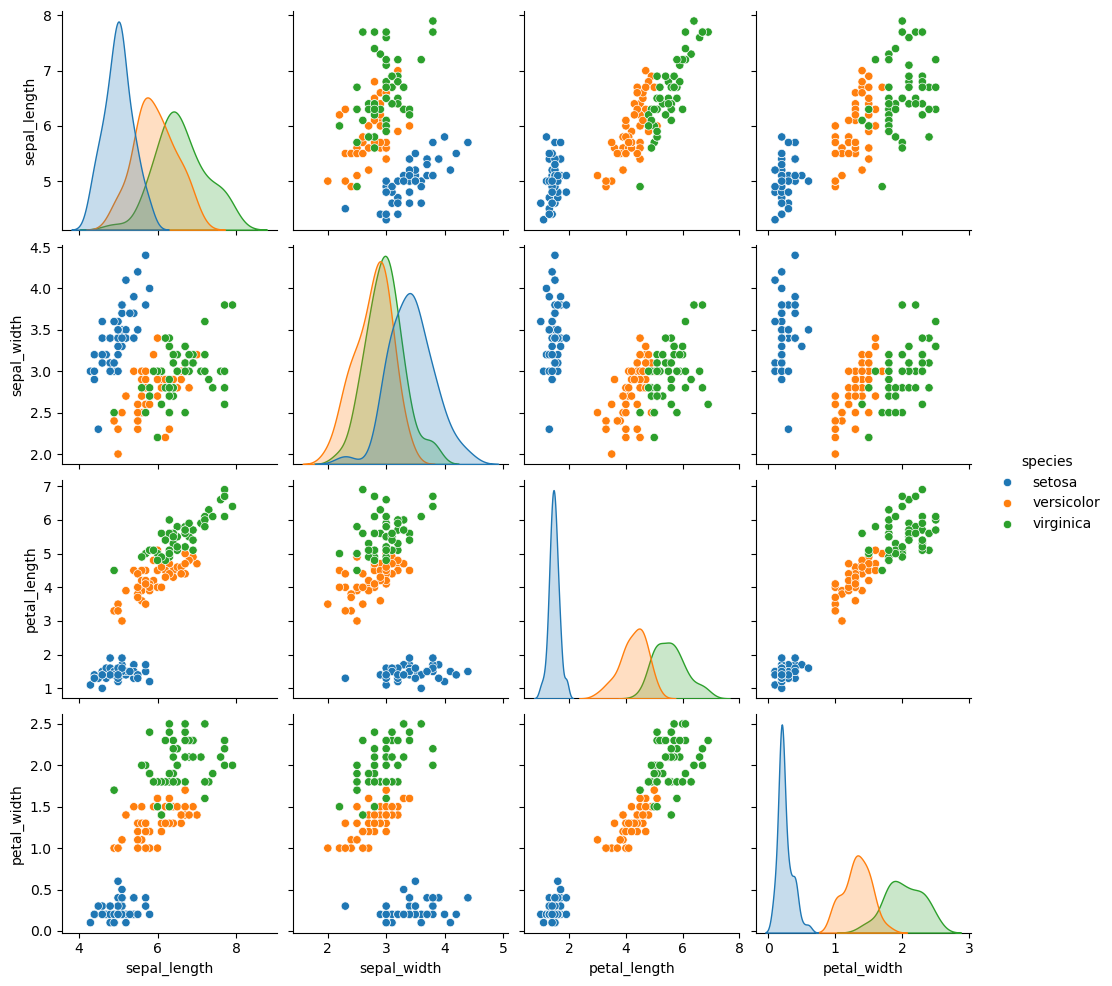

In [14]:
sns.pairplot(df, hue = 'species')

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='petal_length', z='sepal_width',
              color='species', size = 'sepal_length', size_max = 10)
fig.show()

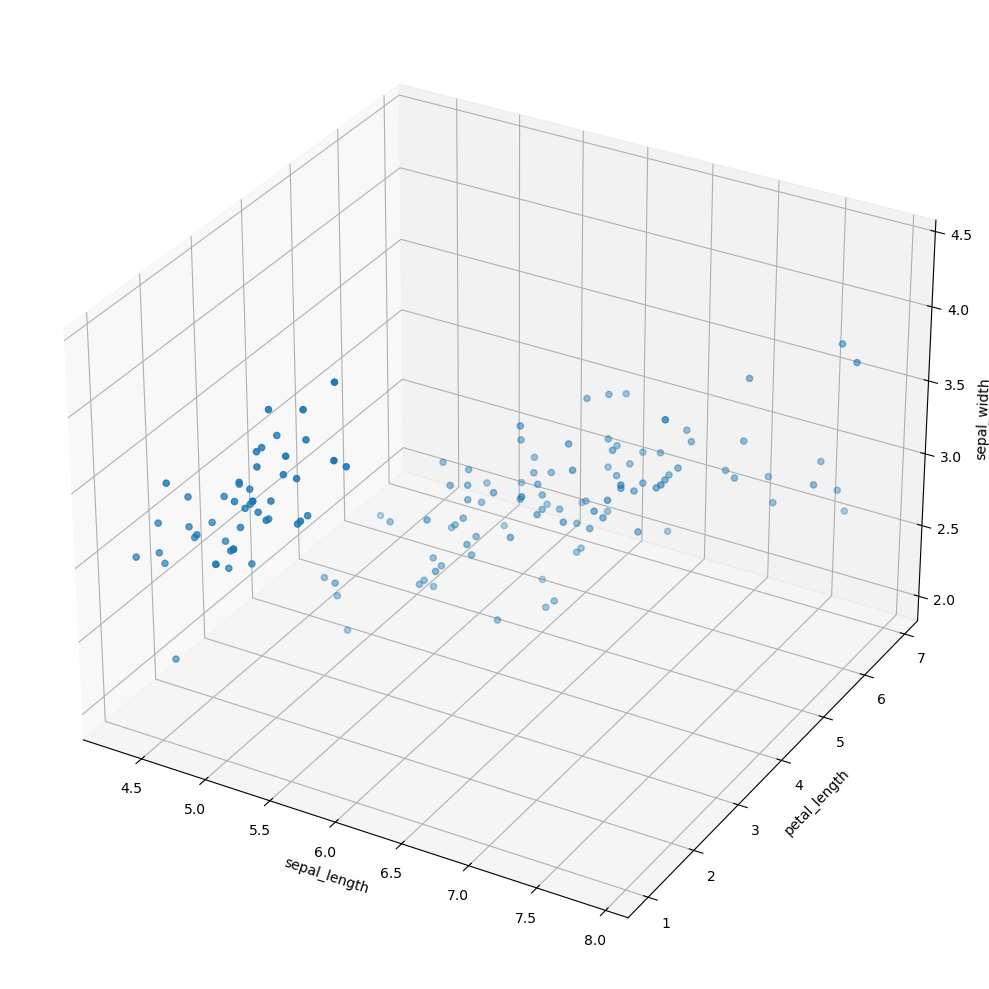

In [17]:
x1 = 'sepal_length'
x2 = 'petal_length'
x3 = 'sepal_width'

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df.loc[:,x1], df.loc[:,x2], df.loc[:,x3])
# Definindo os nomes dos eixos
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel(x3)
plt.tight_layout()
plt.show()

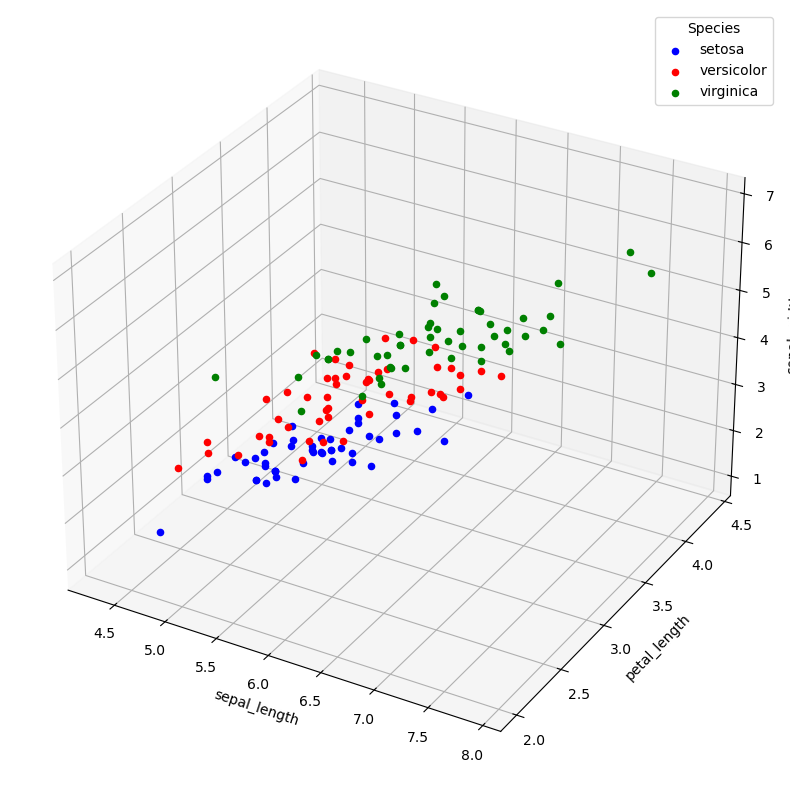

In [18]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
colors = {'setosa': 'b', 'versicolor': 'r', 'virginica': 'g'}

for i in range(0,len(df)):
    ax.scatter(df.iloc[i,0], df.iloc[i,1], df.iloc[i,2], c = colors[df.iloc[i,4]])
# Criando uma legenda
for species, color in colors.items():
    ax.scatter([], [], [], c=color, label=species)  # Ponto vazio apenas para a legenda

ax.set_xlabel('sepal_length')
ax.set_ylabel('petal_length')
ax.set_zlabel('sepal_width')
ax.legend(title="Species")  # Adiciona o título da legenda

plt.show()

In [19]:
# Particionar o dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, stratify = y)

[sklearn - LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [20]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

**O que vamos fazer?**

Vamos criar um modelo Linear SVC com o conjunto de dados iris e visualizar a fronteira de decisão e margens.

Para isso, vamos utilizar as duas primeiras características (sepal_length e sepal_width) para facilitar a visualização em 2D.

Vamos seguir os passos:

1. Treine um modelo Linear SVC com essas duas características.
2. Gere uma grade de pontos para prever e mostrar as fronteiras de decisão e margens.
3. Plote a fronteira e as margens no gráfico.

In [21]:
#Redefinir X e y
X = df[["sepal_length","sepal_width"]]
y = df["species_id"]

In [22]:
# Particionar o dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [23]:
# Sem scaler
svc = LinearSVC(max_iter=4000)
svc.fit(X_train,y_train)

c:\Users\romer\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



LinearSVC(max_iter=4000)

In [24]:
y_pred = svc.predict(X_test)

In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.92      0.85      0.88        13
           2       0.54      0.70      0.61        10
           3       0.85      0.73      0.79        15

    accuracy                           0.76        38
   macro avg       0.77      0.76      0.76        38
weighted avg       0.79      0.76      0.77        38



In [26]:
print(classification_report(svc.predict(X_train), y_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       0.65      0.73      0.69        33
           3       0.76      0.68      0.72        41

    accuracy                           0.80       112
   macro avg       0.80      0.80      0.80       112
weighted avg       0.81      0.80      0.80       112



In [27]:
# Com scaler
scaler = StandardScaler()

In [28]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
svc_scaled = LinearSVC()
svc_scaled.fit(X_train_scaled,y_train)

c:\Users\romer\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



LinearSVC()

In [30]:
y_pred_scaled = svc_scaled.predict(X_test_scaled)

In [31]:
print(classification_report(y_test,y_pred_scaled))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           2       0.67      0.62      0.64        13
           3       0.71      0.77      0.74        13

    accuracy                           0.76        38
   macro avg       0.77      0.77      0.77        38
weighted avg       0.76      0.76      0.76        38



In [32]:
# Nos dados de treinamento
print(classification_report(svc_scaled.predict(X_train_scaled), y_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       0.68      0.68      0.68        37
           3       0.68      0.68      0.68        37

    accuracy                           0.79       112
   macro avg       0.78      0.78      0.78       112
weighted avg       0.79      0.79      0.79       112



## Hiperplano

O hiperplano em um SVM é a linha (em 2D) ou o plano (em 3D) que separa as classes e é definido pela equação de uma reta no caso bidimensional. Vamos ver como adicioná-lo ao gráfico.

No caso de um SVM linear em 2D, o hiperplano de decisão e as margens são dados pela função:

$$ w_0 ⋅ x_0 + w_1 ⋅ x_1 + b = 0 $$

Onde:
* w_0 e w_1 são os coeficientes (pesos) da reta de decisão,
* x_0 e x_1 são as coordenadas de entrada, e
* b é o intercepto do modelo.

In [44]:
list(df["species"].unique())

['setosa', 'versicolor', 'virginica']

c:\Users\romer\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



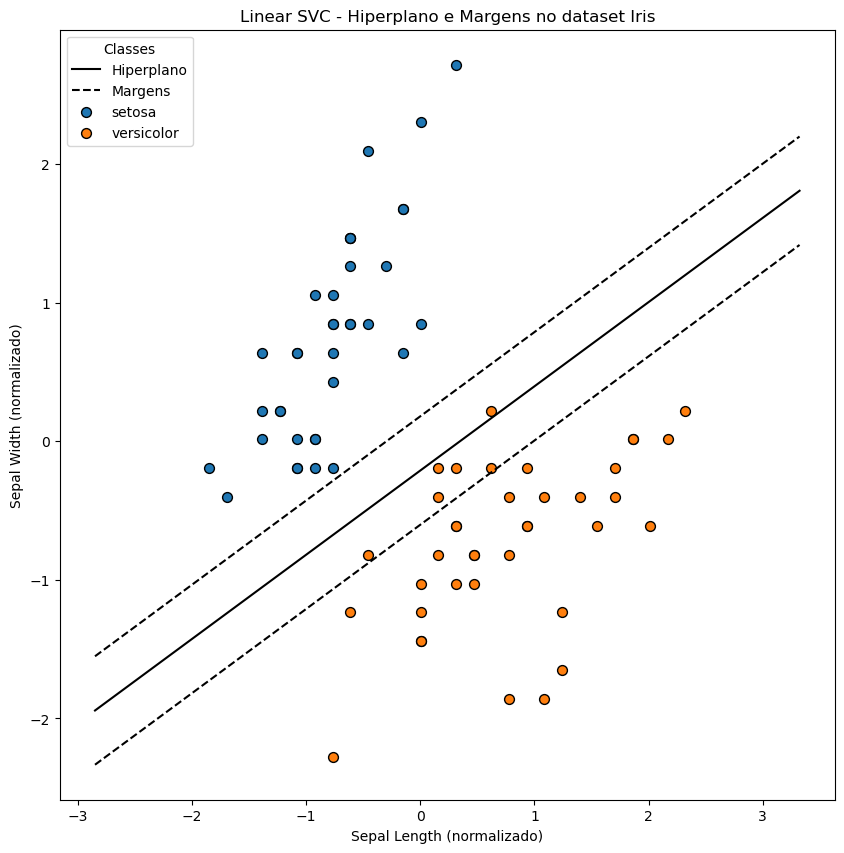

In [47]:
class_names = list(df["species"].unique())  # Nomes das classes

# Filtrar apenas duas classes para tornar o problema binário (SVM linear binário)
X = X[y != 2]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo Linear SVC
model = LinearSVC()
model.fit(X_train, y_train)

# Obter os coeficientes do hiperplano (pesos e intercepto)
w = model.coef_[0]     # Coeficientes do hiperplano
b = model.intercept_[0] # Intercepto do hiperplano

# Definir os limites do gráfico
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx = np.linspace(x_min, x_max, 100)

# Calcular o hiperplano e as margens
yy = -(w[0] * xx + b) / w[1]               # Hiperplano (fronteira de decisão)
yy_margin_up = yy + 1 / np.sqrt(np.sum(w**2))  # Margem superior
yy_margin_down = yy - 1 / np.sqrt(np.sum(w**2)) # Margem inferior

# Plotar o gráfico
plt.figure(figsize=(10, 10))
plt.plot(xx, yy, 'k-', label='Hiperplano')        # Hiperplano de decisão
plt.plot(xx, yy_margin_up, 'k--', label='Margens')  # Margem superior
plt.plot(xx, yy_margin_down, 'k--')               # Margem inferior

# Adicionar os pontos de dados
for i, class_name in enumerate(class_names[:2]): # Apenas as duas classes selecionadas
    plt.scatter(X_train_scaled[y_train == i, 0], X_train_scaled[y_train == i, 1], label=class_name, edgecolors='k', s=50)

# Adicionar título, legendas e exibir a legenda
plt.xlabel('Sepal Length (normalizado)')
plt.ylabel('Sepal Width (normalizado)')
plt.title('Linear SVC - Hiperplano e Margens no dataset Iris')
plt.legend(title="Classes")
plt.show()

## Exercício

Em grupos, [com os dados de caracterização de doenças cardíacas](https://www.kaggle.com/datasets/whenamancodes/heart-failure-clinical-records), utilize diversas abordagens para tentar prever a incidência de doença cardíaca (target = 1) dadas as características relevantes de um paciente. Discutam as melhores estratégias de processamento de dados e modelagem, bem como métricas de performance associadas. Qual seria, na opinião de vocês, o modelo mais indicado?

Exercício 2

1. Utilize a SVC para trabalhar com o Dataset dos Penguins. Queremos identificar as regiões de decisão para a classe "especie"
2. Trabalhe de forma similar ao exemplo da iris. Relembrando lá de cima:
    1) Definimos as features e pontos que iremos utilizar;

    2) Geramos um "grid" de pontos para calcular quais seriam as predições do classificador caso aqueles fossem os valores reais das features*;

    3) Estimamos as predições de classificação e guardamos qual cor deverá ser plotada para aquele ponto;

    4) Fizemos os plots.